<a href="https://colab.research.google.com/github/aymwc16/CS1.289/blob/main/ML_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn

In [ ]:
from sklearn import datasets

dataset = datasets.fetch_lfw_people()
X = dataset['data']

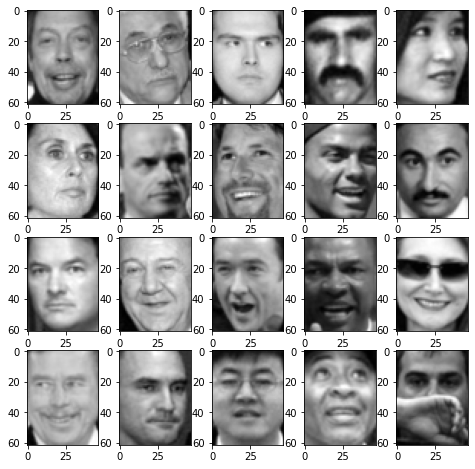

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,5, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    picture = X[i]
    ax.imshow(picture.reshape(62,47),cmap="gray")

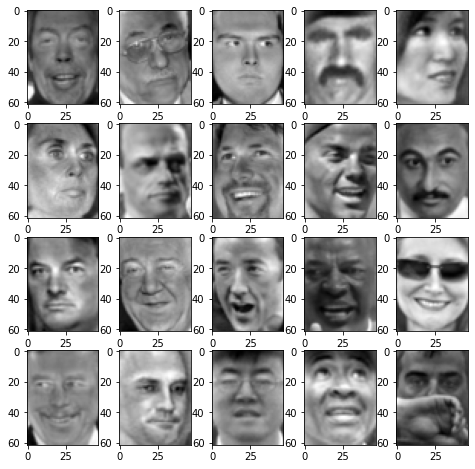

In [ ]:
meaned = X.mean(0)
X_mean = np.zeros(np.shape(X))

for i in range(len(X)):
  X_mean[i] = X[i] - meaned

fig, axes = plt.subplots(4,5, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    picture = X_mean[i]
    ax.imshow(picture.reshape(62,47),cmap="gray")

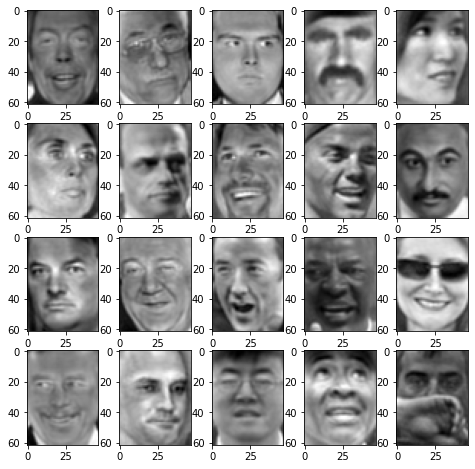

In [ ]:
from numpy import linalg


pc_size = 1000
Gram = X_mean.T @ X_mean
eigVal, eigVec = linalg.eig(Gram)

Qk = eigVec[:,:pc_size]

X_recon_k = X_mean @ Qk @ (Qk.T)

fig, axes = plt.subplots(4,5, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    picture = X_recon_k[i]
    ax.imshow(picture.reshape(62,47),cmap="gray")

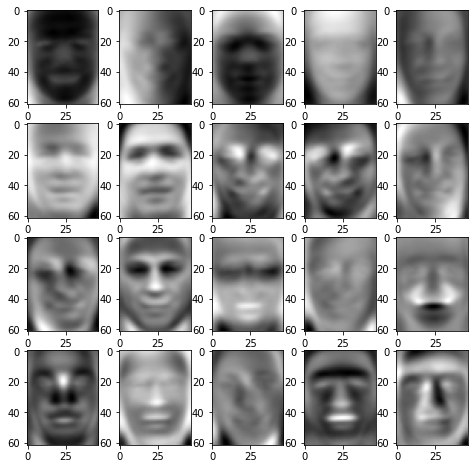

In [ ]:
Q20 = eigVec[:,:20]
fig, axes = plt.subplots(4,5, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    picture = Q20[:,i]
    ax.imshow(picture.reshape(62,47),cmap="gray")

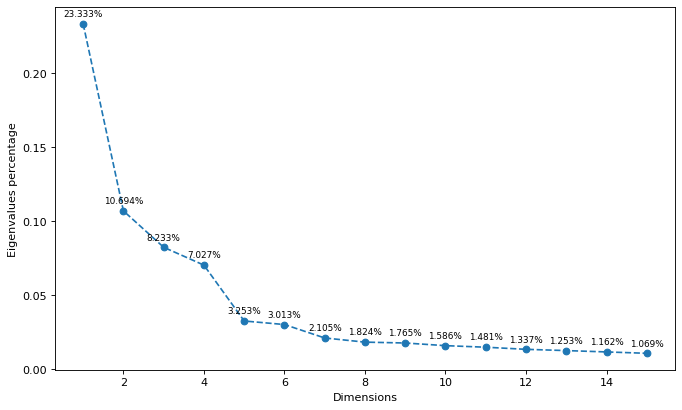

177


In [ ]:
eigVal_percentage = eigVal/eigVal.sum()
dim = np.array([i+1 for i in range(len(eigVal))])

relevant_eig = eigVal_percentage[:] >= 1e-2


fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
plt.plot(dim[relevant_eig],eigVal_percentage[relevant_eig],"--o")
plt.xlabel("Dimensions")
plt.ylabel("Eigenvalues percentage")
for i in range(len(dim[relevant_eig])):
    value = eigVal_percentage[i]*100
    ax.text(dim[i], eigVal_percentage[i]+5e-3, "%.3f%%" %value, ha="center",fontsize=8)
plt.show()

sum = 0
index = 0
while sum<0.95:
  sum += eigVal_percentage[index]
  index += 1
print(index)




# of PCs:	 10
	Reconstruction error of training:	 141453.32513516478
	Reconstruction error of testing:	 70714.25469253921


# of PCs:	 20
	Reconstruction error of training:	 120118.04516618657
	Reconstruction error of testing:	 60039.20409302462


# of PCs:	 50
	Reconstruction error of training:	 91939.60589383412
	Reconstruction error of testing:	 46163.66358479519


# of PCs:	 100
	Reconstruction error of training:	 69542.20307489176
	Reconstruction error of testing:	 35130.52853438043


# of PCs:	 500
	Reconstruction error of training:	 23973.433950651186
	Reconstruction error of testing:	 12873.950909687515


# of PCs:	 1000
	Reconstruction error of training:	 11005.118653907959
	Reconstruction error of testing:	 6427.360975116519


# of PCs:	 2914
	Reconstruction error of training:	 2.6768126211606714e-06
	Reconstruction error of testing:	 1.873559284078988e-06


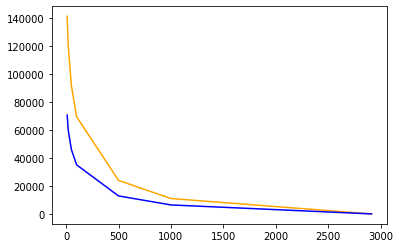

'\n  fig, axes = plt.subplots(4,5, figsize=(8,8))\n  for i,ax in enumerate(axes.flat):\n      picture = X_recon_training[i]\n      ax.imshow(picture.reshape(62,47),cmap="gray")\n  plt.show()\n'

In [ ]:
# Sorting data for training and test
n_train = int(0.8*len(X))
X_train = X[:n_train]
X_test = X[n_train:]

# Training part
meaned = X_train.mean(0)
X_train_mean = np.zeros(np.shape(X_train)) 
for i in range(len(X_train)):
  X_train_mean[i] = X_train[i] - meaned

# Testing part
meaned = X_test.mean(0)
X_test_mean = np.zeros(np.shape(X_test)) 
for i in range(len(X_test)):
  X_test_mean[i] = X_test[i] - meaned

PCs = [10, 20, 50, 100, 500, 1000, 2914]

Errors_training = []
Errors_testing = []

for pc_size in PCs:
  Gram = X_train_mean.T @ X_train_mean
  eigVal, eigVec = linalg.eig(Gram)

  Qk = eigVec[:,:pc_size]

  X_recon_training = X_train_mean @ Qk @ (Qk.T)
  X_recon_testing = X_test_mean @ Qk @ (Qk.T)

  recon_training_error = linalg.norm(X_train_mean-X_recon_training) 
  recon_testing_error = linalg.norm(X_test_mean-X_recon_testing)
  Errors_training.append(recon_training_error)
  Errors_testing.append(recon_testing_error)

  print("\n\n# of PCs:\t",pc_size)
  print("\tReconstruction error of training:\t",recon_training_error)
  print("\tReconstruction error of testing:\t",recon_testing_error)

plt.figure()
plt.plot(PCs,Errors_training,color="orange")
plt.plot(PCs,Errors_testing,color="blue")
plt.show()

"""
  fig, axes = plt.subplots(4,5, figsize=(8,8))
  for i,ax in enumerate(axes.flat):
      picture = X_recon_training[i]
      ax.imshow(picture.reshape(62,47),cmap="gray")
  plt.show()
"""

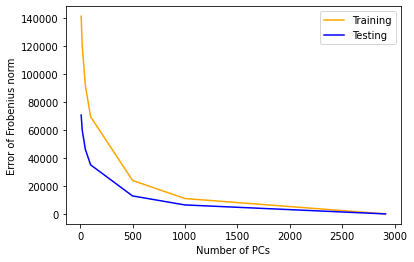

In [ ]:
plt.figure()
plt.xlabel("Number of PCs")
plt.ylabel("Error of Frobenius norm")
plt.plot(PCs,Errors_training,color="orange",label="Training")
plt.plot(PCs,Errors_testing,color="blue",label="Testing")
plt.legend()
plt.show()